# UNSUPERVISED LEARNING. CREATE CUSTOMER SEGMENTS
## STATEMENT OF THE PROBLEM
The goal of this project is to best describe the different types of customers buying from the wholesale distributor warehouse.
The CEO of wholesale distributor wanted to know how to best structure their delivery services to meet the needs of each customers and further realize competitive advantage. 

The dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). 

For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# Import supplementary visualizations code visuals.py
import visuals as vs
%matplotlib inline
warnings.filterwarnings('ignore')

dataset = pd.read_csv('customers.csv')
dataset.head()
dataset.drop(['Region', 'Channel'], axis = 1, inplace = True)

## EDA
In this section, we will begin exploring the data through visualizations and code to understand how each feature is related to the others. 

The dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. The code block below produces a statistical summary for each of the above product categories.

In [3]:
display(dataset.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### SAMPLING
To get a better understanding of the customers and how their data will transform through the analysis, lets select a few sample data points and explore them in more detail.

In [2]:
indices = [176,28,359]

samples = pd.DataFrame(dataset.loc[indices], columns = dataset.keys()).reset_index(drop = True)
print ("---- data sampling ----")
display(samples)

---- data sampling ----


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,45640,6958,6536,7368,1532,230
1,4113,20484,25957,1158,8604,5206
2,796,5878,2109,340,232,776


### ESTABLISH DATA UNDERSTANDING
Considering the total purchase cost of each product category and the statistical description of the dataset above for our sample customers. What kind of establishment (customer) could each of the three samples we've chosen represent?

Looking at the total purchase of each product category above (sampling) and comparing them with the medians of the distributions, some interesting factors can come up.
- First Customer (Index 0)
There is a high amounts of Frozen(7368), way above the median(3071.93). Same thing with Fresh (45640) and Milk (6958) way above the medians which are 12000.29 and 5796.26 respectively. Assumption: This can possibly be a restaurant chain.
- Second Customer (Index 1)
There is really high or close to median levels of purchases from all categories of products excluding deli. Assumption: It might be from a supermarket since supermarket doesn't have a deli section.
- Third Customer (Index 2)
We see a high purchase of milk and somewhat close to median levels for Groceries and Deli. We also see a relatively lower purchase of fresh produce and frozen goods. Assumption: Cafe chain. 

### FEATURE RELEVANCE
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. Some interesting questions to ponder;
- Is it possible to determine whether customers purchasing amounts of one product category will also purchase same proportional amount of another product category? 
Inorder to have this determination, we need to train a supervised regression learner based on the subset of the data with one feature removed, and then score how well that model can predict the removed feature. 

Lets do this for the 'Milk' feature.

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

df_NoMilk = dataset.drop(['Milk'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(df_NoMilk,dataset['Milk'],test_size=0.25,random_state=101)
regressor = DecisionTreeRegressor(random_state=101).fit(X_train,y_train)
score = regressor.score(X_test,y_test)

print(score)

0.29571438444092835


### FEATURE RELEVANCE PREDICTION
The annual spending on Milk products based on the other features predicted R<sup>2</sup> score of 0.2957 (29.57%). The model we built for customer's milk purchasing habits isn't that very good, although it is possible that there's some correlation between this feature and others. It's safe to say that the 'Milk' feature is necessary for identifying customer's spending habits because it isn't possible to predict how a customer spends on Milk based on their spending on the other product categories. We can say that the 'Milk' feature adds extra (and maybe key) information to the data which is not easily inferable by model only through looking at the other features. 

### VISUALIZE FEATURE DISTRIBUTION
This is to get better understanding of the dataset. We can construct a scatter matrix of each of the six product features present in the data. If it is found that the feature we attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if we believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data.

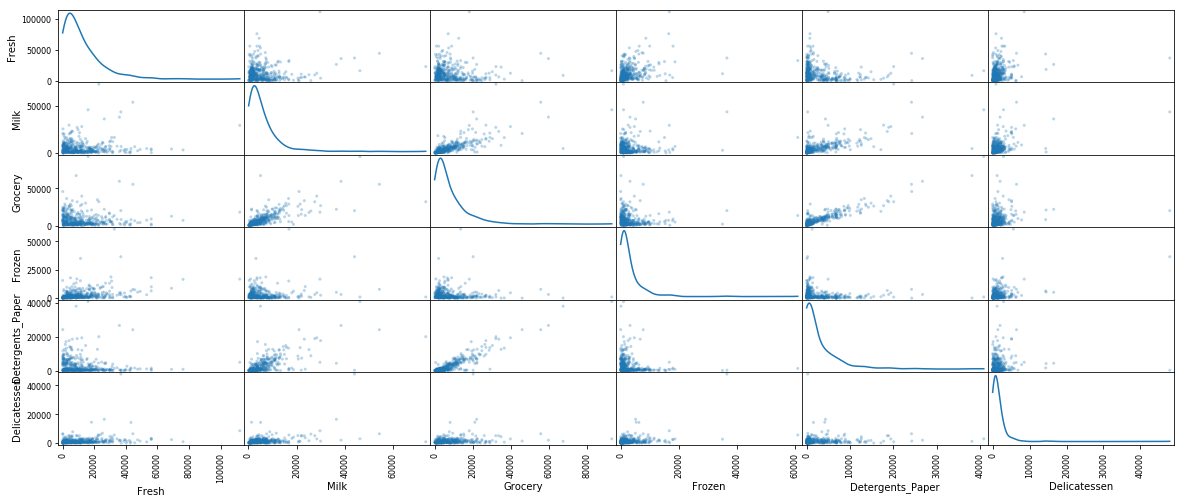

In [4]:
pd.scatter_matrix(dataset, alpha = 0.3, figsize = (20,8), diagonal = 'kde');

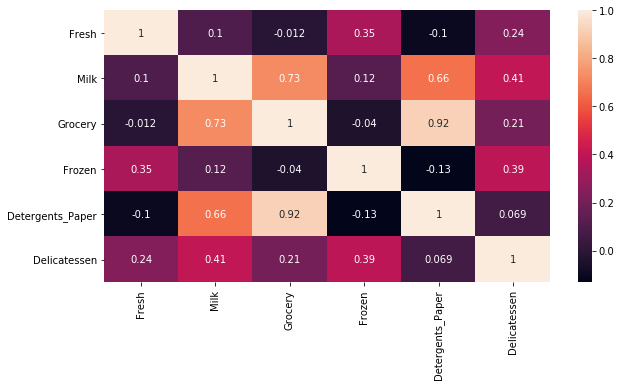

In [16]:
plt.figure(figsize=(10,5)) 
sns.heatmap(dataset.corr(), annot=True) 

### CORRELATIONS
Looking at the plots above, there are a few pairs of features that exhibit some degree of correlation. They include: 
- Milk and Groceries
- Milk and Detergents_Paper
- Grocery and Detergents_Paper

As we tried to predict the 'Milk' feature earlier, this confirms the suspicion that Milk isn't correlated to most of the features in the dataset, although it shows a mild correlation with 'Groceries' and 'Detergents_Paper'.

The distribution of all the features appears to be similar. It is strongly right skewed, in that most of the data points fall in then first few intervals. Judging by the summary statistics, especially the mean and maximum value points, of the features that we calculated earlier, we can expect that there are some outliers in each of the distributions. This conforms with the fact that there's a significant different between the mean and the median of the feature distributions.

## DATA PREPROCESSING
In this section, we will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### FEATURE SCALING (USING LOGARITHM)
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

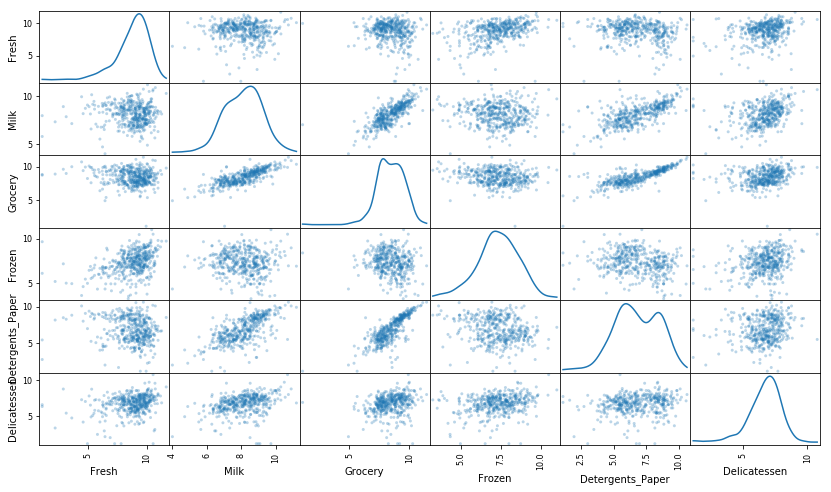

In [5]:
# TODO: Scale the data using the natural logarithm
log_data = dataset.apply(lambda x: np.log(x))

# TODO: Scale the sample data using the natural logarithm
log_samples = samples.apply(lambda x: np.log(x))

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### OBSERVATION
After applying a natural logarithm scaling to the data, the distribution of each feature is more normal and on the same scales

In [6]:
print(log_data)

         Fresh       Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
0     9.446913   9.175335   8.930759  5.365976          7.891331      7.198931
1     8.861775   9.191158   9.166179  7.474205          8.099554      7.482119
2     8.756682   9.083416   8.946896  7.785305          8.165079      8.967504
3     9.492884   7.086738   8.347827  8.764678          6.228511      7.488853
4    10.026369   8.596004   8.881558  8.272571          7.482682      8.553525
5     9.149847   9.019059   8.542081  6.501290          7.492760      7.280008
6     9.403107   8.070594   8.850088  6.173786          8.051978      6.300786
7     8.933137   8.508354   9.151227  7.419980          8.108021      7.850104
8     8.693329   8.201934   8.731013  6.052089          7.447751      6.620073
9     8.700514   9.314070   9.845911  7.055313          8.912608      7.648740
10    8.121480   8.594710   9.470703  8.389360          8.695674      7.463937
11    9.483873   7.024649   8.416931  7.258412      

In [9]:
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,10.728540,8.847647,8.785081,8.904902,7.334329,5.438079
1,8.321908,9.927399,10.164197,7.054450,9.059982,8.557567
2,6.679599,8.678972,7.653969,5.828946,5.446737,6.654153


### HISTOGRAM ANALYSIS 

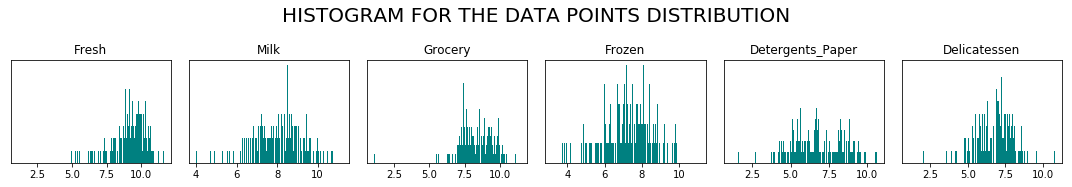

In [10]:
fig = plt.figure(figsize=(15, 12))
plt.suptitle('HISTOGRAM FOR THE DATA POINTS DISTRIBUTION', fontsize=20)
for i in range(1, log_data.shape[1] + 1):
    plt.subplot(6, 6, i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(log_data.columns.values[i - 1])

    vals = np.size(log_data.iloc[:, i - 1].unique())
    
    plt.hist(log_data.iloc[:, i - 1], bins=vals, color='teal')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

### OUTLIER DETECTION
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In [11]:
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = []

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature],25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature],75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3-Q1) * 1.5
    
    # Display the outliers
    print ("Data points considered outliers for the feature '{}':".format(feature))
    out = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    display(out)
    outliers = outliers + list(out.index.values)
    
#Creating list of more outliers which are the same for multiple features.
outliers = list(set([x for x in outliers if outliers.count(x) > 1]))    

print ("Outliers: {}".format(outliers))

# Remove the outliers, if any were specified 
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)
print ("The good dataset now has {} observations after removing outliers.".format(len(good_data)))

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


Outliers: [128, 65, 66, 75, 154]
The good dataset now has 435 observations after removing outliers.


Upon quick inspection, our sample doesn't contain any of the outlier values.

There were 5 data points that were considered outliers for more than one feature based on our definition above. So, instead of removing all outliers (which would result in us losing a lot of information), only outliers that occur for more than one feature are removed.

We can also analyse these outliers independently to answer questions about how or when they occur (root cause analysis), but they might not be suitable for an aggregate analysis.  

### SANITY CHECK ON OUTLIERS
Looking at the histogram distribution, we can see that some data points are at the minimum for Milk, Grocery, Delicatessen and Detergents_Paper, so it is not surprising to see outliers because of the minimum values of this relative fields
0 - This is the minimum for the Delicatessen
3 - This is the minimum for the Detergents_Paper & Grocery
4 - This is the minimum for the Milk

In [12]:
outliers = [128, 65, 66, 75, 154]
samples = pd.DataFrame(log_data.loc[outliers], columns = log_data.keys()).reset_index(drop = True)
print ("---- OUTLIERS ----")
display(samples)

---- OUTLIERS ----


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
1,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
2,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
3,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
4,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


In [13]:
log_data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,8.730544,8.121047,8.441169,7.301396,6.785972,6.665133
std,1.480071,1.081365,1.116172,1.284540,1.721020,1.310832
min,1.098612,4.007333,1.098612,3.218876,1.098612,1.098612
25%,8.048059,7.334981,7.674616,6.609678,5.548101,6.011875
50%,9.048286,8.196159,8.467057,7.330388,6.705018,6.872645
75%,9.737064,8.880480,9.273854,8.175896,8.274341,7.506728
max,11.627601,11.205013,11.437986,11.016479,10.617099,10.777768


## FEATURE TRANSFORMATION
In this section we will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components = None)      
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
ev = pca.explained_variance_ratio_
ev

array([0.55384514, 0.36468046, 0.06603398, 0.00922203, 0.00621839])

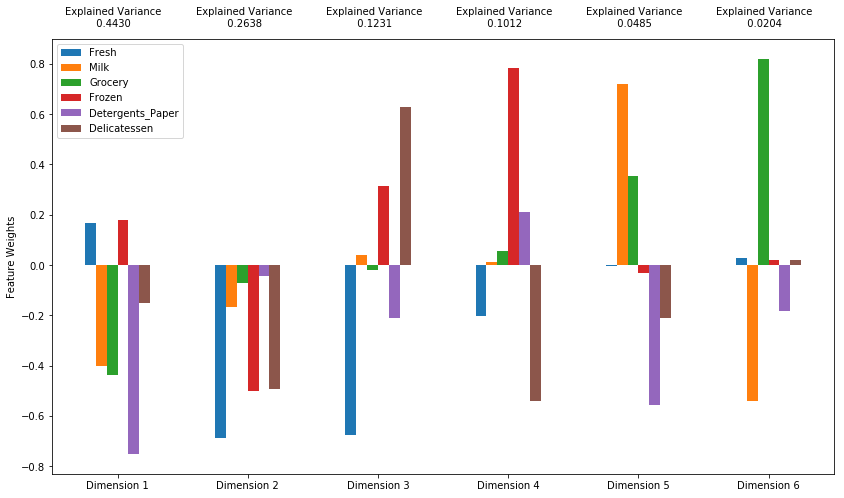

In [15]:
from sklearn.decomposition import PCA

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA().fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

### K-MEANS CLUSTERING 
Is an unsupervised learning algorithm that tries to cluster data based on their similarity. Unsupervised learning means that there is no outcome to be predicted, and the algorithm just tries to find patterns in the data. In 'k' means clustering, we have the specify the number of clusters we want the data to be grouped into. The algorithm randomly assigns each observation to a cluster, and finds the centroid of each cluster. Then, the algorithm iterates through two steps:
- Reassign data points to the cluster whose centroid is closest.
- Calculate new centroid of each cluster.

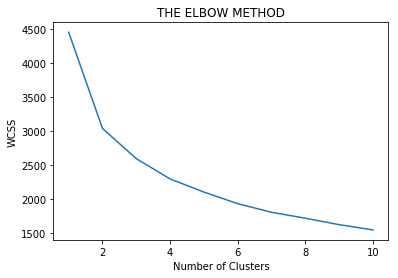

In [34]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(good_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('THE ELBOW METHOD')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [35]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(dataset)
print(y_kmeans)

[0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 1
 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0]


### GAUSSIAN MIXTURE MODEL
This model will help us ascertain the data points belonging to a certain cluster. It start with some prior belief about each data point cluster assignment.
- "What if we are uncertain? What if we think, well, I can't be sure, but there is 70% chance it belongs to the red cluster, but also 10% chance its in green, 20% chance it might be blue. That's a soft assignment. The Mixture of Gaussian model helps us to express this uncertainty. It starts with some prior belief about how certain we are about each point's cluster assignments. As it goes on, it revises those beliefs. But it incorporates the degree of uncertainty we have about our assignment".

In [39]:
n_clusters = [8,7,6,5,4,3,2]

from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

for n in n_clusters:
    
    # TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = GaussianMixture(n_components=n).fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.means_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data,preds)
    
    print ("The silhouette_score for {} clusters is {}".format(n,score)) 

The silhouette_score for 8 clusters is 0.25317109313452807
The silhouette_score for 7 clusters is 0.32500731966888113
The silhouette_score for 6 clusters is 0.2875086094461259
The silhouette_score for 5 clusters is 0.24606593656969744
The silhouette_score for 4 clusters is 0.3401392688233162
The silhouette_score for 3 clusters is 0.31024154369762696
The silhouette_score for 2 clusters is 0.4223246826459388


GMM's silhoutte score for 2 clusters is the best compared to other clusters

### HIERARCHICAL CLUSTERING
Is an algorithm that groups similar objects into groups called clusters. The endpoint is a set of clusters, where each cluster is distinct from each other cluster, and the objects within each cluster are broadly similar to each other

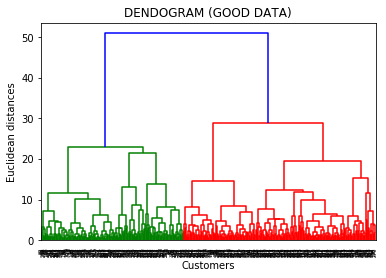

In [37]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(good_data, method = 'ward'))
plt.title("DENDOGRAM (GOOD DATA)")
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

verify the dendogram
- 1) check the longest vertical line
- 2) draw a horizontal line within the longest vertical line
- 3) count the crossing point of the horizontal line with that of vertical line

In [38]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(dataset)
# Pirnt the  predicted clusters
print(y_hc)

[0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 1
 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0
 0 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0
 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0
 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 1 1 1 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1
 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 1 1 1 0 1 1 1 0 0 0 0 1 0
 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1
 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0
 1 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 0 1 0 1 1 1 0 0 0]


## CONCLUSION: HOW TO USE THIS INSIGHTS?

In this final section, we will investigate ways that you can make use of the clustered data. First, we will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Then, we will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data.

Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

#### How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?

Making the change to the delivery service means that products will be delivered fewer times in a week. 

The wholesale distributor can identify the clusters to conduct the A/B test on, but the test should be done on one cluster at a time because the two clusters represent different types of customers, so their delivery needs might be different, and their reaction to change will, thus, be different. In other words, the control and experiment groups should be from the same cluster, at a time.

Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  

#### How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?

To label the new customers, the distributor will first need to build and train a supervised learner on the data that we labeled through clustering. The data to fit will be the estimated spends, and the target variable will be the customer segment i.e. 0 or 1 (i.e. grocery store or restaurant). They can then use the classifier to predict segments for new incoming data.